IMPORT DATA


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Users/suchi/Desktop/EDA/cleaned_dataset.xlsx")


In [29]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              3         1       3   
2              4         1       1   
3              5         0       3   
4              6         0       3   
..           ...       ...     ...   
703          887         0       2   
704          888         1       1   
705          889         0       3   
706          890         1       1   
707          891         0       3   

                                             Name  Sex       Age  SibSp  \
0                         Braund, Mr. Owen Harris    0  0.271174      1   
1                          Heikkinen, Miss. Laina    1  0.321438      0   
2    Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1   
3                        Allen, Mr. William Henry    0  0.434531      0   
4                                Moran, Mr. James    0  0.367921      0   
..                                            ...  ...       ...    ...   
703               

1.Generate summary statistics (mean, median, std, etc.).


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  708 non-null    int64  
 1   Survived     708 non-null    int64  
 2   Pclass       708 non-null    int64  
 3   Name         708 non-null    object 
 4   Sex          708 non-null    int64  
 5   Age          708 non-null    float64
 6   SibSp        708 non-null    int64  
 7   Parch        708 non-null    int64  
 8   Ticket       708 non-null    object 
 9   Fare         708 non-null    float64
 10  Cabin        95 non-null     object 
 11  Embarked_Q   708 non-null    bool   
 12  Embarked_S   708 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(3)
memory usage: 62.4+ KB


In [31]:
df.describe() #gives statistics only for numerical valuess(DEFAULT)
#(df.describe(include='number'))  # Only numeric 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,449.714689,0.331921,2.518362,0.319209,0.352112,0.399718,0.313559,0.033445
std,260.208426,0.471236,0.714332,0.466500,0.119765,0.840859,0.782038,0.026183
min,1.000000,0.000000,1.000000,0.000000,0.044986,0.000000,0.000000,0.000000
25%,219.500000,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015379
50%,450.500000,0.000000,3.000000,0.000000,0.367921,0.000000,0.000000,0.021942
75%,676.250000,1.000000,3.000000,1.000000,0.396833,1.000000,0.000000,0.049767
max,891.000000,1.000000,3.000000,1.000000,0.648153,5.000000,6.000000,0.126872


In [32]:
df.describe(include=object)#'object' is a data type that typically refers to text (string) data. 

,Name,Ticket,Cabin
count,708,708,95
unique,708,595,72
top,"Dooley, Mr. Patrick",1601,G6
freq,1,7,3


In [33]:
print(df.isnull().sum())
print(df.duplicated().sum()) # Total duplicate rows


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          613
Embarked_Q       0
Embarked_S       0
dtype: int64
0


In [34]:
df.drop('Cabin', axis=1, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

2.Create histograms and boxplots for numeric features.


HISTPLOTS

USING PANDAS

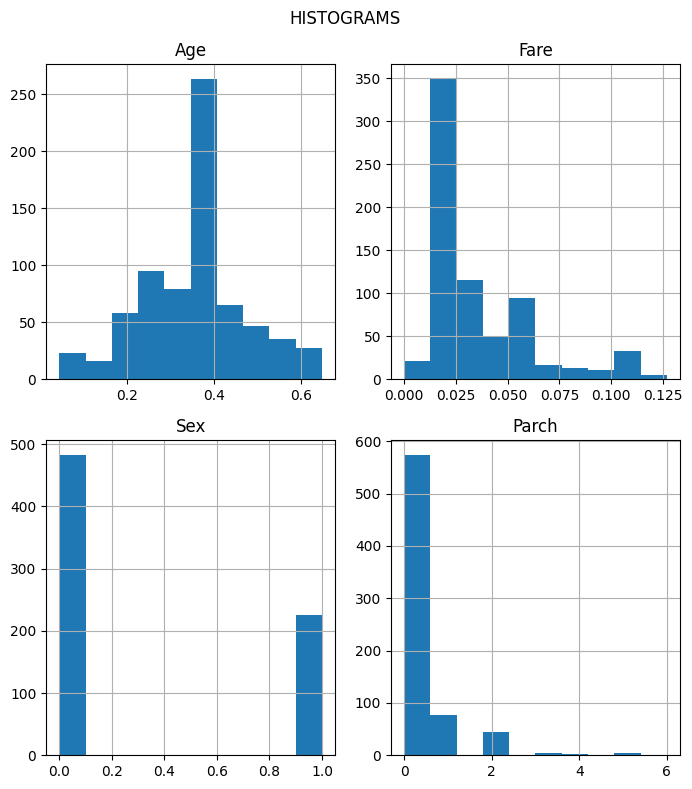

In [ ]:
df.hist(column=['Age','Fare','Sex','Parch'],figsize=(7,8),bins=10)
plt.suptitle("HISTOGRAMS")#Adds a super title above all subplots
plt.tight_layout()#Adjusts spacing to prevent overlap
plt.show()


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

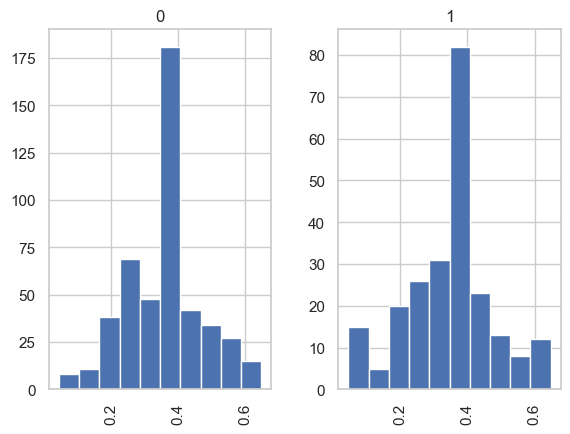

In [74]:
df.hist(column='Age',by='Survived')

USING SEABORN

<Axes: xlabel='Age', ylabel='Count'>

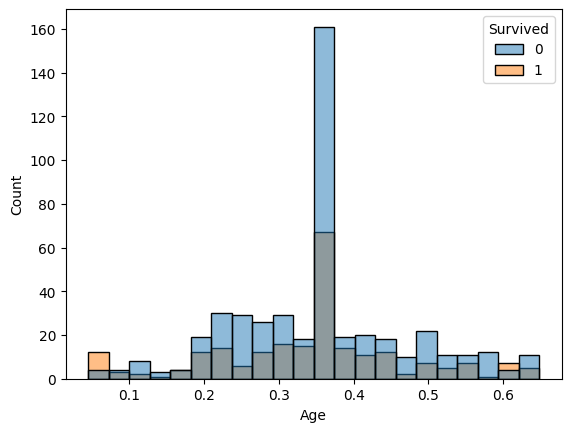

In [ ]:
#HUE is a pramater in seaborn It lets you split the data by categories and color them differently.
sns.histplot(data=df, x='Age', hue='Survived')


<Axes: xlabel='Fare', ylabel='Count'>

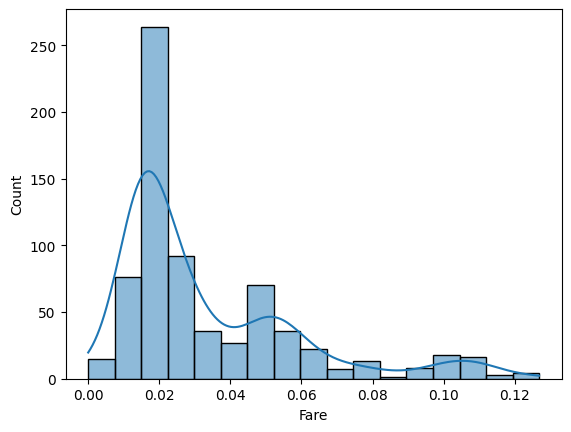

In [ ]:
#KDE (Kernel Density Estimation)It draws a smooth curve over the histogram to estimate the distribution.
sns.histplot(data=df, x='Fare', kde=True)


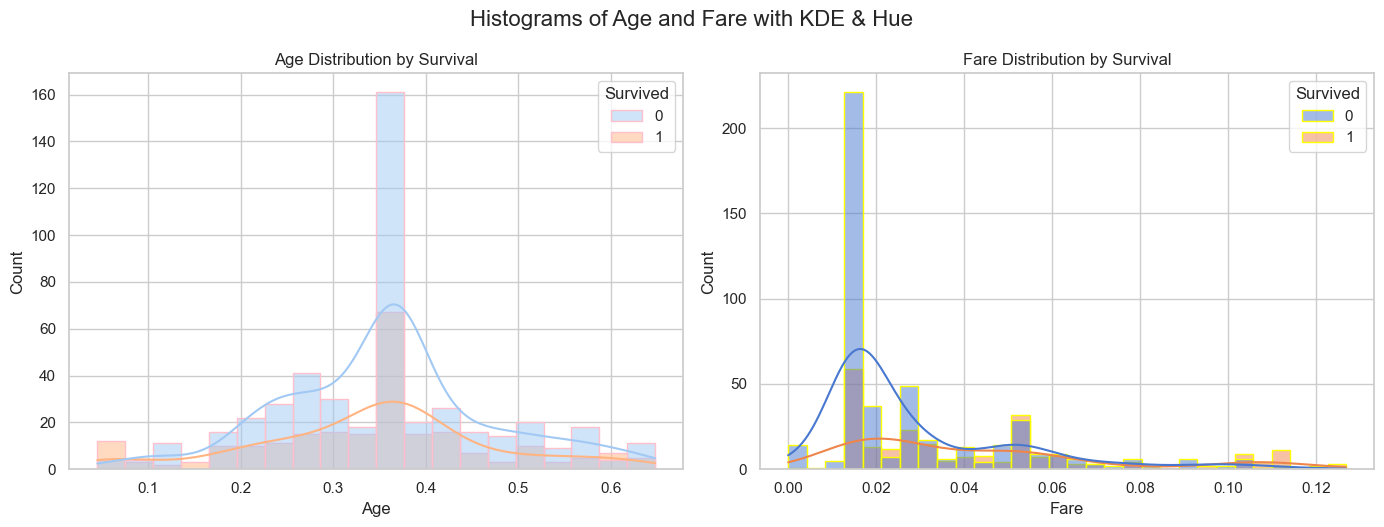

In [58]:

# Set style
sns.set(style="whitegrid")

# Create a 1x2 plot for Age and Fare
plt.figure(figsize=(14, 5))

# Age GRAPH
plt.subplot(1, 2, 1)#Selects the left plot in a 1x2 --- creating subplots in a figure using matplotlib.
#SYNTAX:plt.subplot(nrows, ncols, index)
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=20, palette='pastel', edgecolor='pink')
plt.title('Age Distribution by Survival')

# Fare GRAPH
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30, palette='muted', edgecolor='yellow')
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.suptitle("Histograms of Age and Fare with KDE & Hue", fontsize=16, y=1.05)
plt.show()

BOXPLOTS------------

USING PANDAS

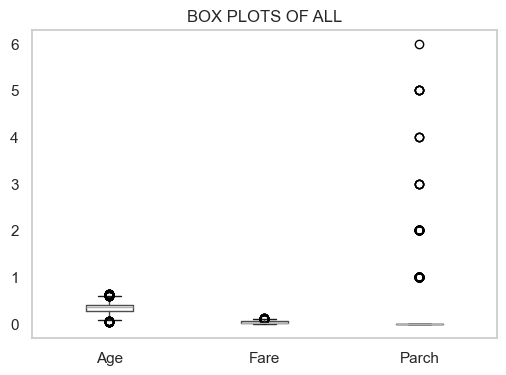

In [66]:
df.boxplot(column=['Age','Fare','Parch'], figsize=(6,4), grid=False)
plt.title('BOX PLOTS OF ALL') 
plt.show()


Text(0.5, 0.98, 'Age Distribution by Survival')

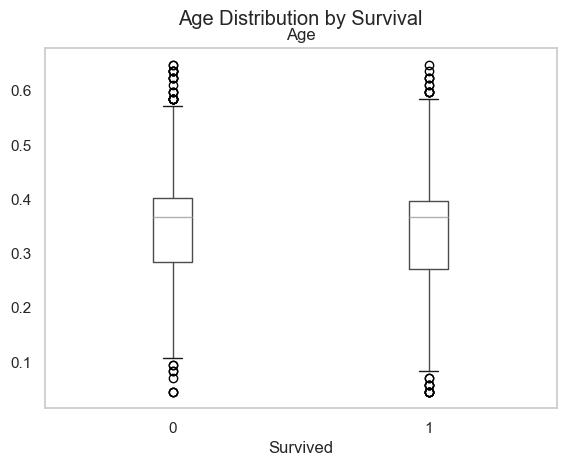

In [90]:
df.boxplot(column='Age',by='Survived',grid=False)# by for categorical on x axis and column for y axis numerical
plt.suptitle("Age Distribution by Survival")


USING SEABORN

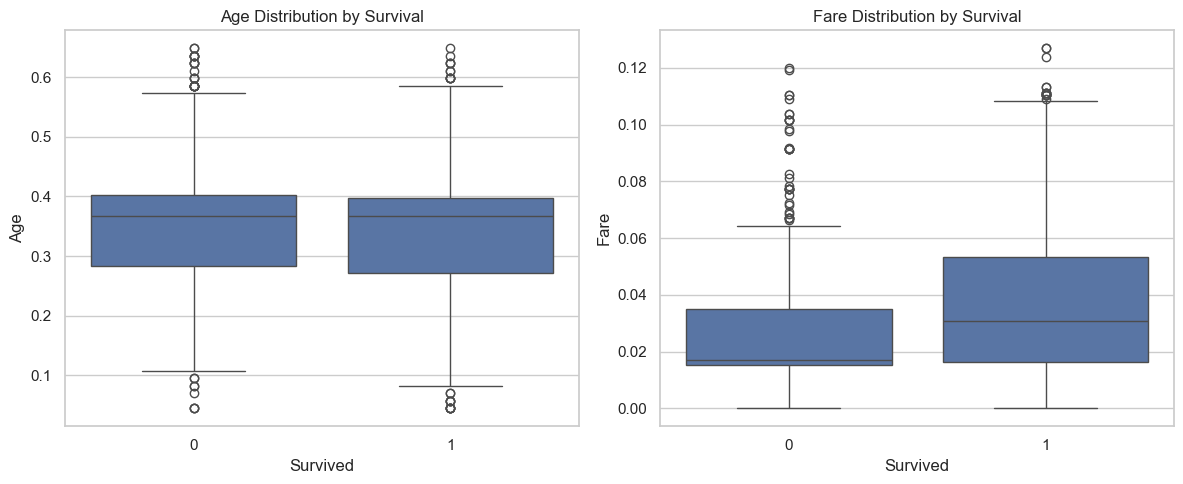

In [86]:

plt.figure(figsize=(12,5))

# Boxplot for Age by Survival
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')

# Boxplot for Fare by Survival
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()


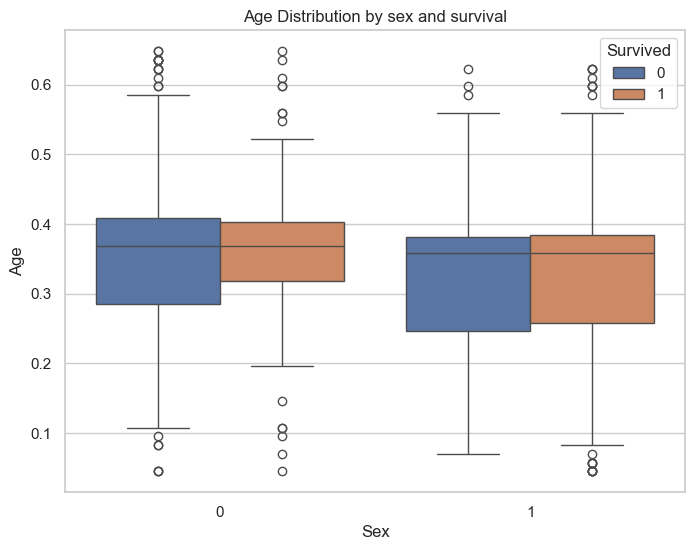

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.boxplot(x='Sex',y='Age', hue='Survived', data=df,)# x must be categorical #y must be numerical

plt.title('Age Distribution by sex and survival')
plt.xlabel('Sex')
plt.ylabel('Age')

plt.show()


3.Use pairplot/correlation matrix for feature relationships.


A correlation matrix shows how much two numerical features are related.
It gives a value between -1 and +1:

+1 = perfect positive correlation (both increase together)

-1 = perfect negative correlation (one increases, other decreases)

0 = no correlation

<Axes: >

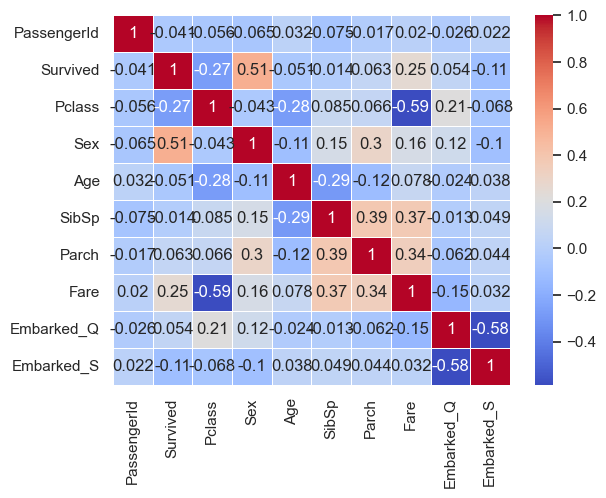

In [ ]:
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')


A pairplot creates:

Scatter plots for every pair of numeric features

Histograms/Kernel Density Plots on the diagonal

Optional color coding using hue (e.g., by Survived)



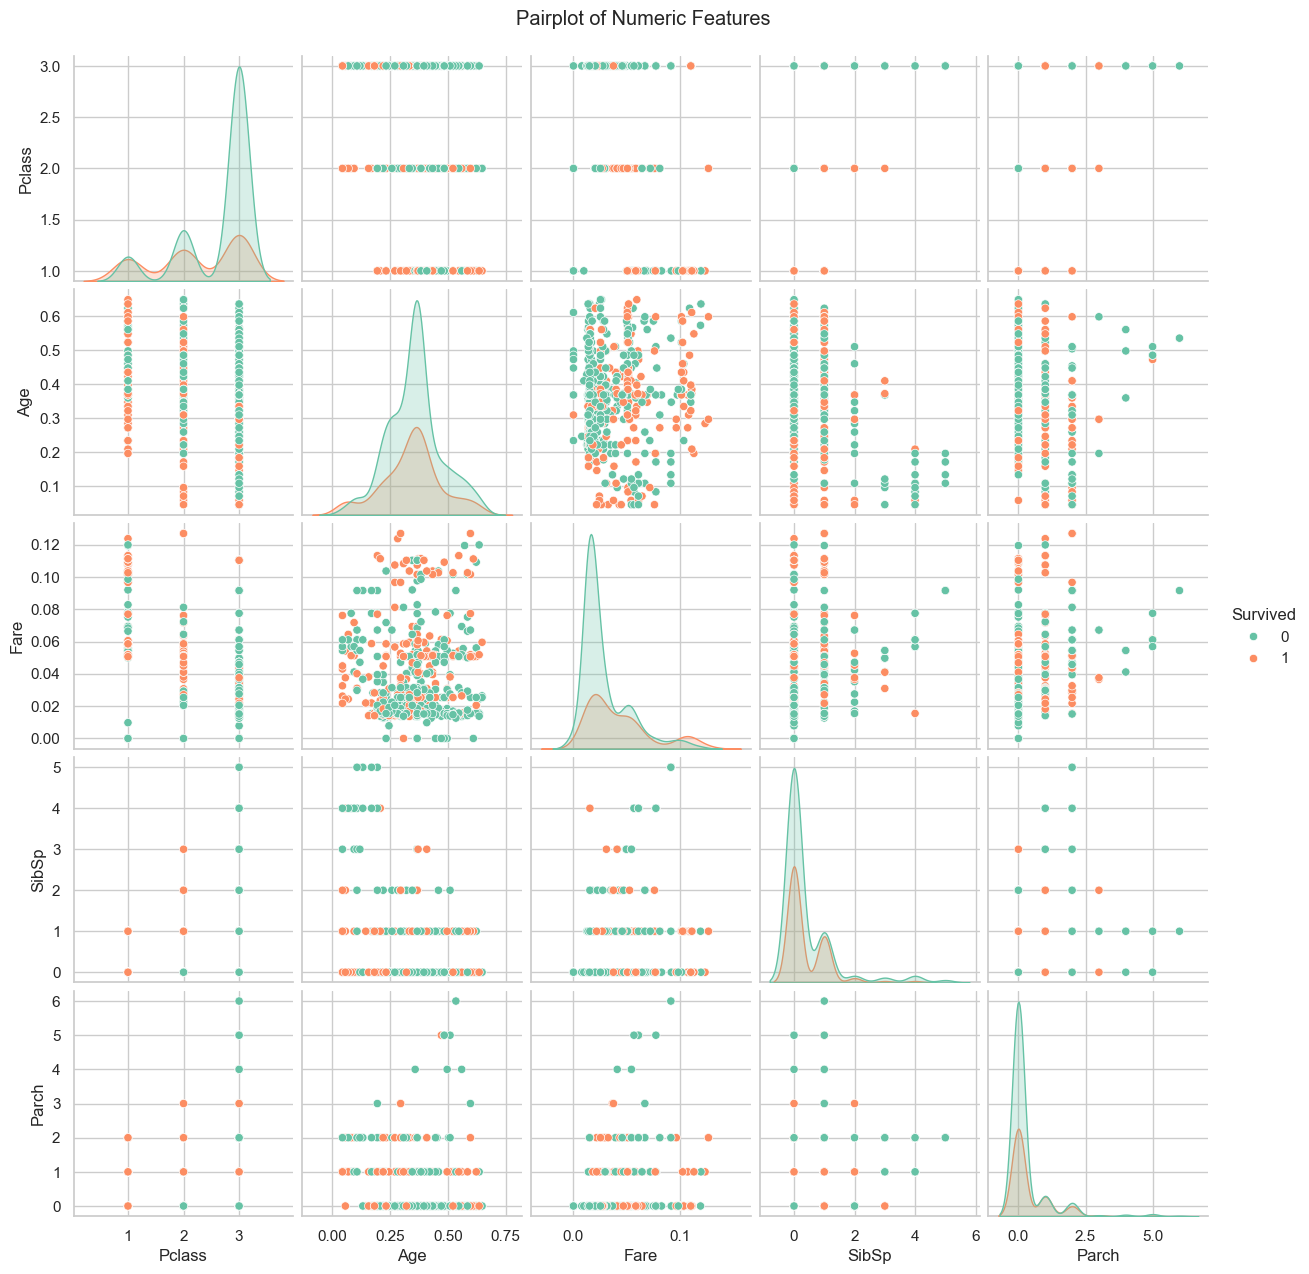

In [97]:
# Selecting useful columns
cols = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']

# Pairplot with hue as survival status
sns.pairplot(df[cols], hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

4.Identify patterns, trends, or anomalies in the data.


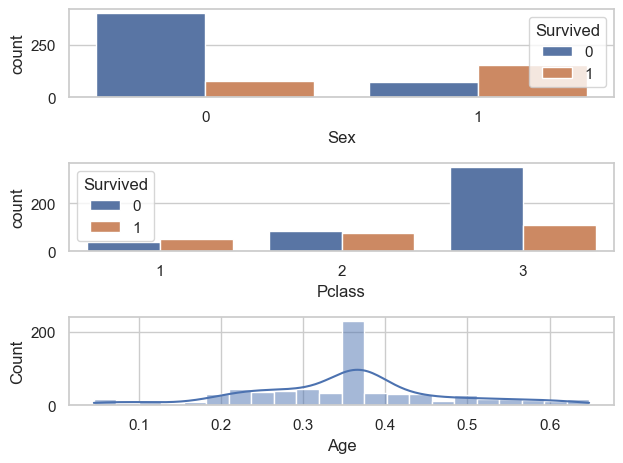

In [109]:

#1. Survival Rate vs Gender
plt.subplot(3,1,1)
sns.countplot(x='Sex', hue='Survived', data=df)#Females survived at much higher rates than males.

# 2. Survival Rate vs Passenger Class
plt.subplot(3,1,2)
sns.countplot(x='Pclass', hue='Survived', data=df)
#3. Age Distribution
plt.subplot(3,1,3)
sns.histplot(data=df,x='Age',kde=True)

plt.tight_layout()





Text(0.5, 1.0, 'Survival by Age Group')

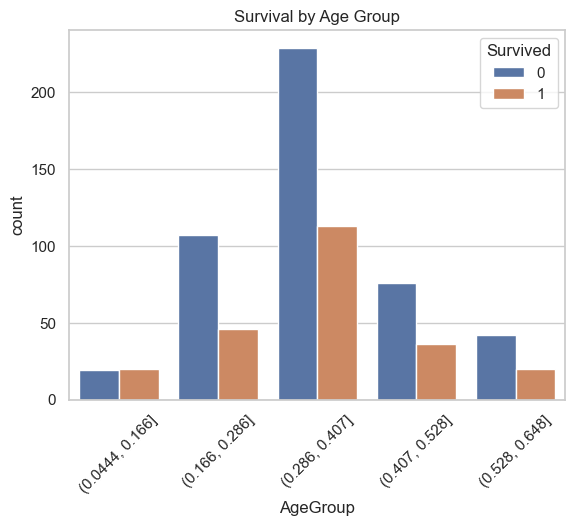

In [110]:
# Age group patterns
df['AgeGroup'] = pd.cut(df['Age'], bins=5)
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.xticks(rotation=45)
plt.title("Survival by Age Group")

5.Make basic feature-level inferences from visuals

In [119]:
# Pclass-wise survival rate (in percentage)
print("Survival Rate by Pclass (%):")
print((df.groupby('Pclass')['Survived'].mean() * 100).round(2))
print()

# Gender-wise survival rate (in percentage)
print("Survival Rate by Sex (%):")
print((df.groupby('Sex')['Survived'].mean() * 100).round(2))
print()

# Age group-wise survival rate (in percentage)
print("Survival Rate by AgeGroup (%):")
print((df.groupby('AgeGroup')['Survived'].mean() * 100).round(2))



Survival Rate by Pclass (%):
Pclass
1    56.52
2    47.13
3    23.75
Name: Survived, dtype: float64

Survival Rate by Sex (%):
Sex
0    16.60
1    68.58
Name: Survived, dtype: float64

Survival Rate by AgeGroup (%):
AgeGroup
(0.0444, 0.166]    51.28
(0.166, 0.286]     30.07
(0.286, 0.407]     33.04
(0.407, 0.528]     32.14
(0.528, 0.648]     32.26
Name: Survived, dtype: float64


C:\Users\suchi\AppData\Local\Temp\ipykernel_12320\2456128186.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df.groupby('AgeGroup')['Survived'].mean() * 100).round(2))
